# Засоиб підготовки та аналізу даних
# Лабораторна робота №6

In [37]:
import numpy as np
import matplotlib.pyplot as plt

## Завдання 1
1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу
результатів.
2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k^ та b^.
3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).
4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

In [38]:
#1

k = 12
b = 7
n = 500

# x = np.random.randn(n)
x = np.linspace(0, 10, n)

y = k * x + b + np.random.normal(0, 5, n)

# print("x:", x)
# print("y:", y)

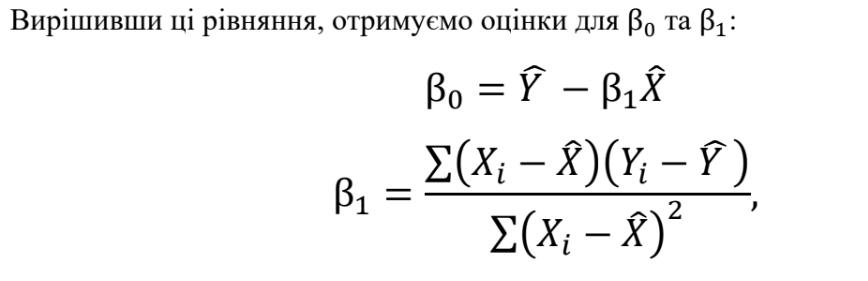

In [39]:
#2
def sq(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    sum1 = ((x-mean_x)*(y-mean_y)).sum()
    # for i, j in zip(x, y):
    #     sum1 += (i-mean_x)*(j-mean_y)
    
        
    sum2 = ((x-mean_x)**2).sum()
    # for i in x:
    #     sum2 += (i-mean_x)**2

    b1 = sum1/sum2
    b0 = mean_y - mean_x*b1

    return b1, b0

b1, b0 = sq(x, y)
print(b1)
print(b0)

11.839887384446147
7.641981714924313


In [40]:
#3

# ну схожі ж
args = np.polyfit(x,y,1)
print(args)

[11.83988738  7.64198171]


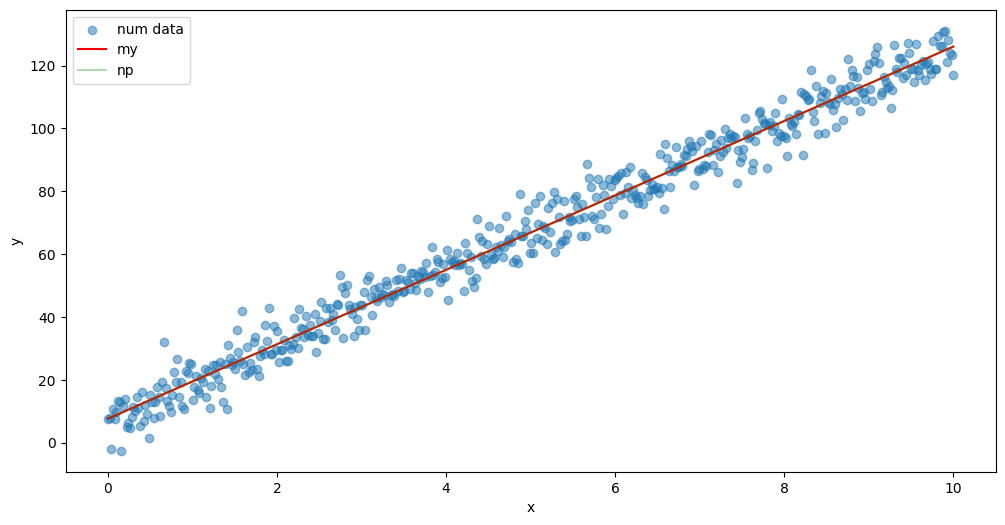

In [41]:
#4
plt.figure(figsize=(12,6))
plt.scatter(x, y, alpha=0.5, label='num data')

plt.plot(x, b1*x + b0, color='red', label='my')
plt.plot(x, args[0]*x+args[1], alpha=0.3, color='green', label='np')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

## Завдання 2
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k^ та b^. Визначіть оптимальні вхідні параметри: learning_rate, n_iter
2. Додайте отриману лінію регресії на загальний графік
3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки
4. Порівняйте отримані результати з результатами попереднього завдання

In [42]:
#1
def MSE (b0, b1):
    global n
    sum = ((y-b0-b1*x)**2).sum()
    # for i, j in zip(x, y):
    #     sum += (j-b0-b1*i)**2
    
    return sum/n

def gradient_descent(x, y, learning_rate=0.01, n_iter=500, e=0):
    k = 0  # b1
    b = 0  # b0
    m = len(x)
    
    k_history = []
    b_history = []
    mse_history = []
    
    for i in range(n_iter):
        y_pred = k * x + b


        gradient_b = (-2/m) * np.sum(y - y_pred)
        gradient_k = (-2/m) * np.sum(x * (y - y_pred))
        
        b -= learning_rate * gradient_b
        k -= learning_rate * gradient_k
        
        mse_history.append(MSE(b, k))  
        k_history.append(k)
        b_history.append(b)
        if e != 0 and len(mse_history)>=2:
            if abs(mse_history[-1] - mse_history[-2]) <= e:
                break
    
    return k_history, b_history, mse_history


print(f"k = {k}, b = {b}")
gk, gb, mse = gradient_descent(x, y,)
gk = gk[-1]
gb = gb[-1]
print(f"grad_k = {gk}, grad_b = {gb}")

k = 12, b = 7
grad_k = 11.91385593038118, grad_b = 7.1519914392688095


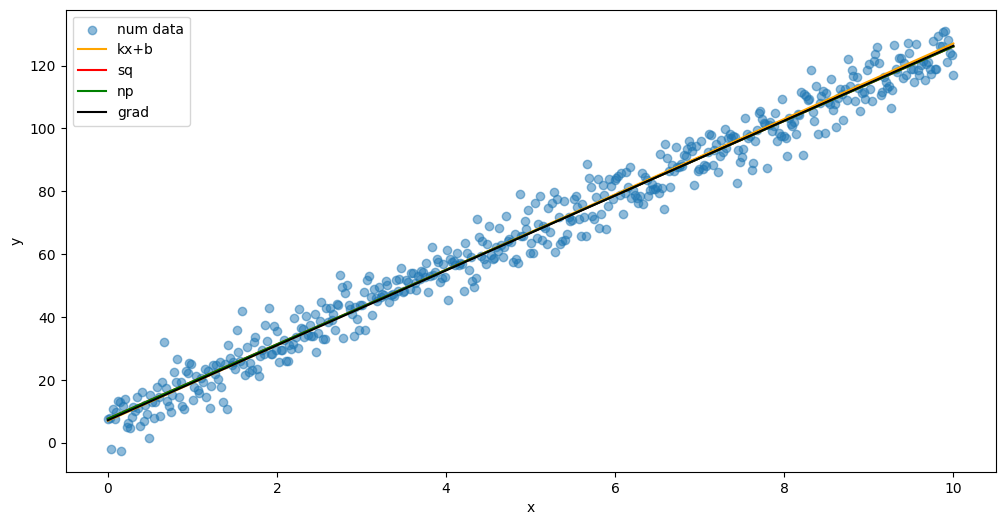

kx+b: 26.02783142051305
sq: 25.967618695796475
np: 25.967618695796478
grab: 26.02783142051305


In [43]:
#2

plt.figure(figsize=(12,6))
plt.scatter(x, y, alpha=0.5, label='num data')


plt.plot(x, k*x + b, color='orange', label='kx+b')
plt.plot(x, b1*x + b0, color='red', label='sq')
plt.plot(x, args[0]*x+args[1], color='green', label='np')

k, b, mse = gradient_descent(x, y,)
k = k[-1]
b = b[-1]
plt.plot(x, gk*x+gb, color='black', label='grad')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

print(f"kx+b: {MSE(b, k)}")
print(f"sq: {MSE(b0, b1)}")
print(f"np: {MSE(args[1], args[0])}")
print(f"grab: {MSE(gb, gk)}")

MSE with k  &  b: 26.02783142051305
MSE with b1 & b0: 25.967618695796475


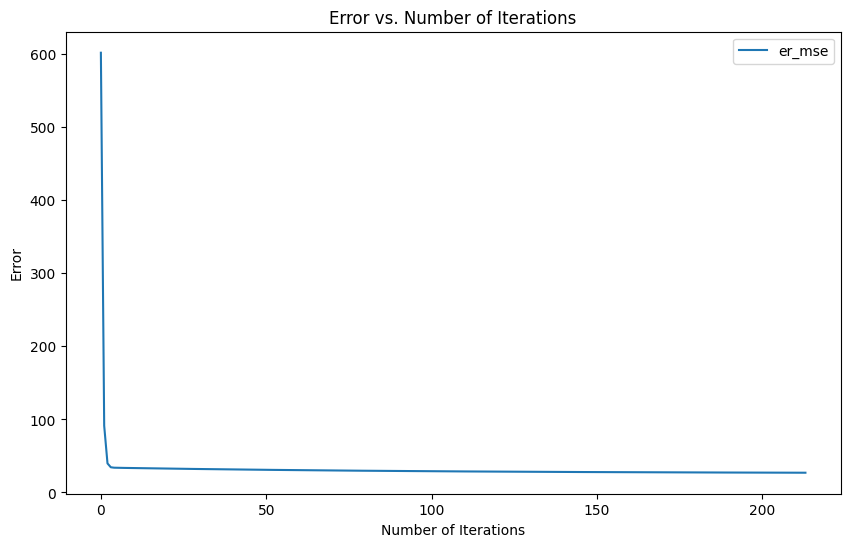

In [55]:
#3

print(f"MSE with k  &  b: {MSE(b, k)}")
print(f"MSE with b1 & b0: {MSE(b0, b1)}")

n = 500
k_hist, b_hist, mse_hist = gradient_descent(x, y, n_iter=n, e=0.01)
iters = np.arange(len(mse_hist))



plt.figure(figsize=(10, 6))
plt.plot(iters, mse_hist, label='er_mse')

plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Error vs. Number of Iterations')
plt.legend()
plt.show()